In [3]:
from scipy import stats
import numpy as np
import seaborn as sns

sns.set_context('talk')

In [29]:
# Funzioni utili
def set_axes(fig, xl='x_label', yl='y_label'):
    fig.axes.set_xlabel(xl)
    fig.axes.set_ylabel(yl)
    return fig


# Lezione 6 - 17.03.2020

## Alcune note sugli esercizi, su scipy stats, e seaborn

* Discussione su soluzioni esercizi
* Alcuni aspetti di Python utili per risolvere problemi di probabilità (tipo quelli che vi ho dato per casa) e per presentare i dati visivamente.
    1. Il pacchetto scientifico di Python, [scipy](https://docs.scipy.org) contiene il modulo [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) 

    2. [Seaborn](https://seaborn.pydata.org/) per realizzare rapidamente plot statistici 


## Esercizi

## Esercizio 2 foglio 1
Gruppo di 50 persone, 18 donne, 32 uomini. Ne selezioniamo 10 per una commissione. Qual è la probabilità che di queste 10, 3 siano donne?

In [139]:
sample_space = np.hstack([np.zeros(18),np.ones(32)])
N = 1

esperimenti = np.array([np.random.choice(sample_space,size=10,replace=False).sum() == 7 for i in range(N)])
esperimenti.mean()
#ok = 0 
#for i in range(N):
#    commissione = np.random.choice(sample_space,size=10,replace=False)
#    if commissione.sum() == 7:
#        ok +=1

#freq = ok / N
#print(freq)

s = 'A23456789#JQK'
np.array(s*4,dtype='c')

s[2:3]

'3'

In [129]:
cards = set(('A',2,3,4,5,6,7,8,9,10,'J','Q','K'))
deck = list(cards)*4
assert len(deck) == 52, "wrong number of cards"
def check_aces(deck):
    """Check if every player got an Ace,
    by assuming that the first 13 cards are given to 
    player 1, the second to player 2 etc. If the deck
    is perfectly shuffled this is equivalent to give each
    player a card in turn."""
    l = 13
    check = np.array(['A' in deck[i*l:(i+1)*l] for i in (0,1,2,3)])
    return check.all()

# Number of different samplings to try out (check what happens when N changes).
N = 1000
# perform the "experiment"
samples = np.array([check_aces(np.random.choice(deck,52,replace=False)) for i in range(N)])
# the approximated probability (frequentist approach) is the average frequency.
samples.mean()

0.107

## Esercizio 3 foglio 1
Mazzo francese di 52 carte, perfettamente mescolato. Diviso in 4 mani di 13 carte ognuna. Determinare la probabilità che ogni giocatore abbia in mano un asso

## Scipy.stats  
* Definisce un centinaio di distribuzioni di probabilità (famiglie di funzioni)
* Permette di calcolarne le proprietà  (media, varianza, momenti...).
* Permette di plottarne la distribuzione cumulata e la densità di probabilità.
* E` estendibile definendo la propria distribuzione analitica (come vedremo).



## Seaborn 
E` un pacchetto per realizzare rapidamente grafici statistici, basato su matplotlib. 
Include

* Grafici di funzione
* Istogrammi con fit 
* Joint distributions (di 2 variabili)
* heatmaps
* scatterplots
* Box-plots, violinplots, etc
* ...

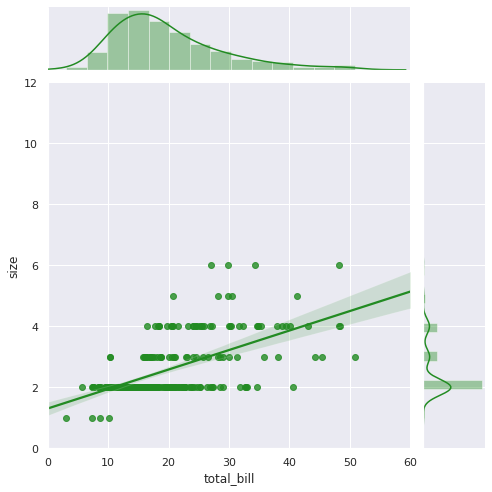

In [143]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
bill_tip_plot = sns.jointplot("total_bill", "size", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="forestgreen", height=7);


In [75]:
tips.head(20)

total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
17       16.29  3.71    Male     No  Sun  Dinner     3
18       16.97  3.50  Female     No  Sun  Dinner     3
19       20.65  3.35    Male     No  Sat  Dinner     3

## Seaborn permette di fare una prima rapida analisi

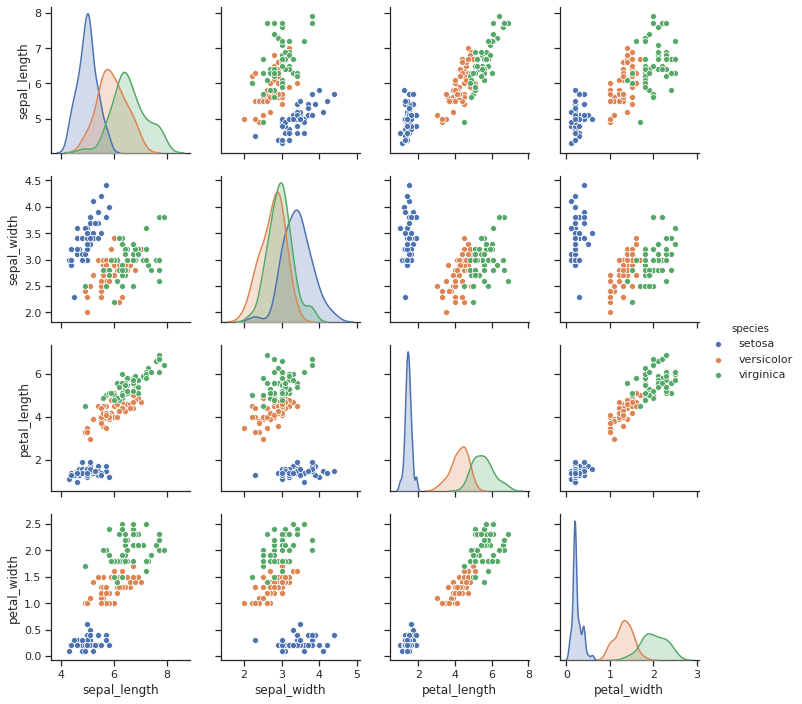

In [145]:
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")


## Brevissimo tutorial su scipy.stats

Questo non vi esime da studiare il [tutorial ufficiale](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) che è molto più completo!

`Scipy.stats` include varie classi che definiscono famiglie di distribuzioni di probabilità, sia continue che discrete e.g.:

* `stats.norm` gaussiana
* `stats.uniform` uniforme
* `stats.binom` binomiale
* ...


## Le distribuzioni sono implementate come sottoclassi di un templato

1. Si 'costruiscono' allo stesso modo: `loc` e `scale` sono i parametri con cui definirle.
2. Hanno la stessa interfaccia, cioè gli stessi metodi (funzioni) che potete chiamare.

Esempio: **gaussiana con media 1.0 e std_dev 2.0**

In [146]:
gaussian = stats.norm(loc=1, scale=2)
dir(gaussian)[-13:]

['mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'support',
 'var']

In [157]:
#f = sns.distplot(gaussian.rvs(100000))
#set_axes(f,xl='x',yl='f(x)')
gaussian.mean()-gaussian.rvs(10000000).mean()

-1.4034409247187796e-05

# L' interfaccia definisce una serie di misure utili

*  rvs: sampling casuali dalla distribuzione
*  pdf: Probability Density Function (densità di probabilità o funzione probabilità)
*  cdf: Cumulative Distribution Function (distribuzione (cumulata) di probabilità 
*  sf: Survival Function (1-CDF)
*  stats: ritorna media, varianza, asimmetria di Fisher (skew) o coef. di kurtosis 
*  mean: media
*  median: mediana
*  variance: varianza
*  ...



## Esempio: calcolare alcune probabilità sul lancio di una moneta

Moneta con bias: $p(T)=0.3$. 
1. Qual è la probabilità di avere 4 volte testa in 20 lanci?
2. Qual è la probabilità di avere meno di 4 volte testa in 20 lanci?
3. Qual è la probabilità di avere tra 10 e 13 volte testa in 20 lanci?


In [161]:
binom = stats.binom(n=20,p=0.3)
binom.pmf(4)

0.13042097437387037

In [163]:
binom.cdf(13) - binom.cdf(9)

0.04770085032428406

## Possiamo anche ottenere i plot delle pdf e cdf:

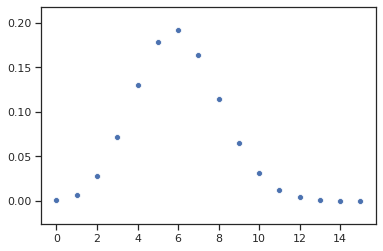

In [168]:
X = np.linspace(-10,10,1000)
#sns.lineplot(X,gaussian.cdf(X),label='cdf')
#sns.lineplot(X, gaussian.pdf(X),label='pdf')
Y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
sns.scatterplot(Y,binom.pmf(Y))

## Definire le proprie distribuzioni di probabilità 

(Queste slide sul subclassing sono state solo accennate)

* Vediamo questo tema come esempio di 'subclassing'. 
     - Torna spesso utile specializzare o allargare un pacchetto python.
     - Lo si può fare in più maniere, una è l'ereditarietà: si specializza una classe 'madre' o templato.

## Definire le proprie distribuzioni di probabilità 

* In qualche caso (ad esempio gli esercizi..) la distribuzione non è inclusa in quelle di `scipy.stats`.
* Possiamo aggiungerla in qualche maniera? (si)

## Le distribuzioni univariate di scipy sono sottoclassi..

![sottoclassi](./img_lect_6/scipy_stats_subclass.png)

## .. E quindi?

![gang of four](img_lect_6/go4_subclass.jpg)
_Immagine adattata da Design Patterns, Gamma, elm, Johnson, Vlissides_

## .. E quindi possiamo ereditare rv_continuous per definire la nostra distribuzione
(Prima di provare leggete il [tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html))

La parte precedente sulle classi è stata solo accenntata a lezione in quanto ereditare da rv_continuous è meno immediato di come potrebbe apparire dal tutorial. Invito comunque i più temerari a provarci perché è un ottimo modo per sperimentare con Python.

## Perché usare numpy al posto di liste, tuple, etc.
* Più metodi definiti
* Le funzioni matematiche in numpy sono parallele e lavorano su interi array
* Tutte le funzioni sono implementate in C++ ottimizzato e quindi sono molto più veloci

Per fare un  esempio sulle velocità calcoliamo la somma dei numeri da 0 a 999 in python e con numpy.. 

In [4]:
a = list(range(1000)) # lista
b = np.array(a) #np.array

In [5]:
%%timeit
b.sum()

3.19 µs ± 104 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%%timeit
s = 0
for x in a:
    s+=x

40.7 µs ± 553 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
#nota: si può usare la built-in function sum.
#e` molto più veloce del ciclo for, ma comunque più lenta di numpy!
%%timeit
sum(a)

6.95 µs ± 106 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
